In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from scipy.integrate import *
from scipy.optimize import minimize

In [2]:
def f(t, y, alpha):
    x_1, x_2, p_1, p_2 = y
    dy_dt = [x_2, np.sign(p_2-1/(1+alpha*x_1**2*x_2**2)), -2*np.sign(p_2-1/(1+alpha*x_1**2*x_2**2))*alpha*x_1/(1+alpha*x_1**2*x_2**2)**2, -p_1-2*np.sign(p_2-1/(1+alpha*x_1**2*x_2**2))*alpha*x_2/(1+alpha*x_1**2*x_2**2)**2]                                     
    return dy_dt

In [8]:
def R_K(x, alpha, ind):
    y_0 = [0, 0, x[0], x[1]]
    sol_1 = solve_ivp(f,[0,1], y_0, method='DOP853',args = [alpha], dense_output=True, atol=2.221e-14, rtol=2.221e-14)
    if (ind==0):
        return (sol_1.y[0, -1]+11/24, sol_1.y[3, -1])
    else:
        t = np.linspace(0,1,10000)
        return(sol_1.sol(t))

In [9]:
def norm_f(x,  alpha, R_K):
    temp_1, temp_2 = R_K(x,alpha, 0)
    temp_1_x, temp_2_x = (R_K([x[0]+delta, x[1]], alpha, 0) - np.array([temp_1,temp_2]) )/delta
    temp_1_y, temp_2_y = (R_K([x[0], x[1]+delta], alpha, 0) - np.array([temp_1,temp_2]) )/delta
    return math.sqrt((temp_1**2)/(temp_1_x**2 + temp_1_y**2) + (temp_2**2)/(temp_2_x**2 + temp_2_y**2))

In [10]:
def Newton(temp, eps, alpha, R_K):
    print('Норма Федоренко на i-ом шаге метода Ньютона:')
    for i in range(1000):
        norm = norm_f(temp, alpha, R_K)
        print(f'Norm[{i}] = {norm}')
        if norm > eps:
            temp_1, temp_2 = R_K(temp,alpha, 0)
            temp_1_x, temp_2_x = (R_K([temp[0]+delta, temp[1]], alpha, 0) - np.array([temp_1,temp_2]) )/delta
            temp_1_y, temp_2_y = (R_K([temp[0], temp[1]+delta], alpha, 0) - np.array([temp_1,temp_2]) )/delta
            matrix = np.linalg.inv(np.array([[temp_1_x, temp_1_y],[temp_2_x, temp_2_y]]))
#             temp = temp - matrix.dot(np.array([temp_1,temp_2])) * 0.5
            temp = temp - matrix.dot(np.array([temp_1,temp_2]))
        else:
            return temp
    print(f'Не сошлось, последняя норма = {norm}')
    return temp

Норма Федоренко на i-ом шаге метода Ньютона:
Norm[0] = 2.2278730161813333e-13
Norm[1] = 2.284623419036954e-13
Norm[2] = 2.119290595528557e-13
Norm[3] = 8.718690075112044e-14

Интеграл = -0.9578957895789579
dx1(1) = 1.6714407635731732e-13, dp2(1) = -4.440892098500626e-16
p1(0) = 1.0215078369107093, p2(0) = 1.0215078369107091
Разница двух методов: [2.10942375e-13 2.10720330e-13]


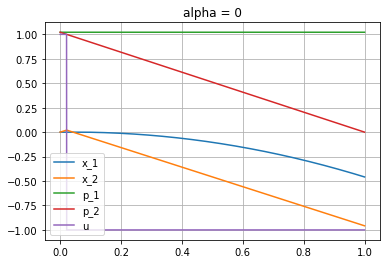

Норма Федоренко на i-ом шаге метода Ньютона:
Norm[0] = 0.05109154474211625
Norm[1] = 3.738525041475524e-06
Norm[2] = 2.307678927044103e-11
Norm[3] = 1.2859570307259065e-14

Интеграл = -0.95528721242592
dx1(1) = -2.6700863742235015e-14, dp2(1) = -1.7486012637846216e-15
p1(0) = 0.9358000536809523, p2(0) = 1.0197475900425315
Разница двух методов: [-3.43698203e-09 -1.51699520e-09]


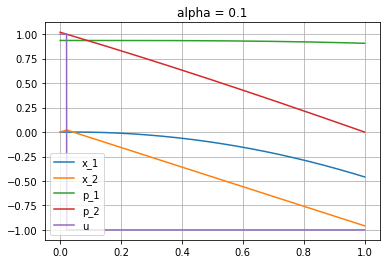

Норма Федоренко на i-ом шаге метода Ньютона:
Norm[0] = 0.20763565341209606
Norm[1] = 0.000384346909120121
Norm[2] = 1.8161468840211446e-06
Norm[3] = 6.084213927710754e-11
Norm[4] = 2.425754447781443e-14


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """



Интеграл = -0.9339606189967249
dx1(1) = -1.315059172668498e-13, dp2(1) = -1.4108852974814567e-13
p1(0) = 0.23021386786255735, p2(0) = 1.0052904467891786
Разница двух методов: [2.36919070e-09 6.87978563e-11]


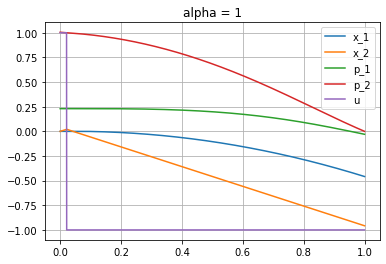

In [11]:
c1 = math.sqrt(24/23)
temp1 = [c1, c1]
temp2 = [c1, c1]
delta = 1e-6
for alpha in [0,0.1,1]:
    
    temp1 = Newton(temp1, 1e-13, alpha, R_K)
    
    res = minimize(norm_f, temp2, method = 'Nelder-Mead', args=(alpha, R_K), tol = 1e-8)
    temp2 = res.x
    
    z = R_K(temp1, alpha, 1)
    t = np.linspace(0,1,10000)
    x_1, x_2, p_1, p_2 = z
    B = simps(np.sign(p_2-1/(1+alpha*x_1**2*x_2**2))/(1+alpha*x_1**2*x_2**2), t)
    print(f'\nИнтеграл = {B}\ndx1(1) = {x_1[-1]+11/24}, dp2(1) = {p_2[-1]}\np1(0) = {p_1[0]}, p2(0) = {p_2[0]}')
    print(f'Разница двух методов: {temp1-temp2}')
    plt.title('alpha = {}'.format(alpha))
    plt.plot(t,z.T)
    plt.plot(t,np.sign(p_2-1/(1+alpha*x_1**2*x_2**2)))
    plt.legend(['x_1','x_2','p_1','p_2','u'])
    plt.grid(True)
    plt.show()